Spatial Working Memory Implementation of (Compte et. al.)
===============================================

Excersise from the book *Neuronal Dynamics
From single neurons to networks and models of cognition*, Chapter 18, 
by Wulfram Gerstner, Werner M. Kistler, Richard Naud and Liam Paninski

Detailed excersise page: https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/spatial-working-memory.html

The model has been introduced by Compte et. al. [1]. The parameters used here differ from the original paper. They are changed such that we can still study some effects while simulating a small network.

[1] Compte, A., Brunel, N., Goldman-Rakic, P. S., & Wang, X. J. (2000). Synaptic mechanisms and network dynamics underlying spatial working memory in a cortical network model. Cerebral Cortex, 10(9), 910-923.

In [16]:
# Load libraries

# Compatibility between Python 2 and Python 3
from __future__ import division, print_function, unicode_literals, absolute_import

%matplotlib inline
import math
import numpy as np
from brian2 import *
import matplotlib.pyplot as plt
from neurodynex.working_memory_network import wm_model
from neurodynex.tools import plot_tools

collected_data_file = 'Data/collected_drift_trials.npy' # The file to store the collected trials data

Example Run of the Spatial Working Memory Ring Attractor and Plotting
----------------------------------------------------------------------

INFO       width adjusted from 1. ms to 1.1 ms [brian2.monitors.ratemonitor.adjusted_width]


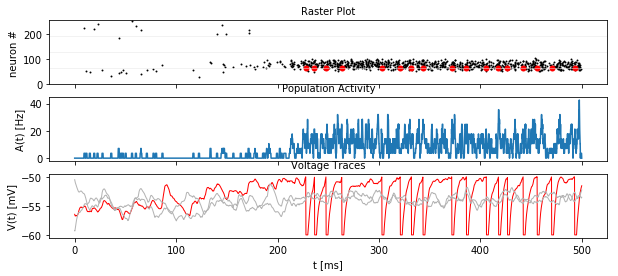

In [3]:
# Run the default model in the package
# N_excitatory=256, N_inhibitory=64, weight_scaling_factor=8.0
wm_model.getting_started()

**Figure caption:**

_Top:_ A weak stimulus, centered at 120deg, is applied to a subset of the excitatory population from t=100ms to t=300ms. This creates an activity bump in the excitatory subpopulation. The activity is sustained after the end of the stimulation. 

_Middle:_ The population activity increases over time while the stimulus is applied. 

_Bottom:_ Voltage traces for three selected neurons. The spikes of the red neuron are visible in the top and bottom panel.

Run the simulation for custom ring attractor parameters
------------------------------------------------------------------

N_excitatory=1024, N_inhibitory=256, N_extern_poisson=1000, weight_scaling_factor=2.0, stimulus_center_deg=180, stimulus_width_deg=40, stimulus_strength=70. * pamp, t_stimulus_start=0. * second, t_stimulus_duration=0. * second

(<Figure size 720x288 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11b3dfd90>)

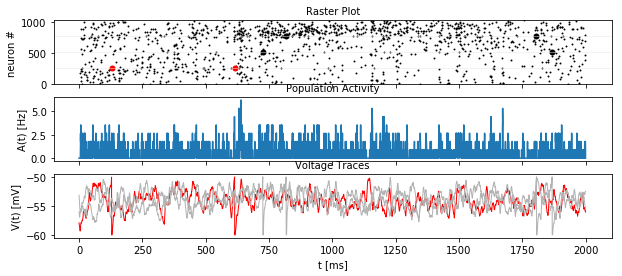

In [4]:
# Run with unstructured Poisson input (all neurons receive similar activity)
sim_time_duration    = 2000. * ms
poisson_firing_rate  = 1.3 * Hz
sigma_weight_profile = 20.
Jpos_excit2excit     = 1.6
t_stimulus_start=0*ms
t_stimulus_duration=0*ms

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, weight_profile_45 = wm_model.simulate_wm(sim_time=sim_time_duration, poisson_firing_rate=poisson_firing_rate, sigma_weight_profile=sigma_weight_profile, Jpos_excit2excit=Jpos_excit2excit, t_stimulus_start=t_stimulus_start, t_stimulus_duration=t_stimulus_duration)
plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * ms)

(<Figure size 720x288 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11ca28790>)

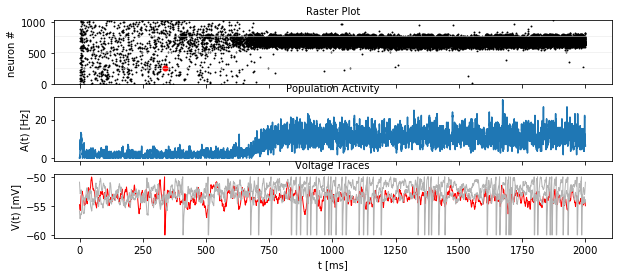

In [5]:
# Run with unstructured Poisson input of higher impulse rate (all neurons receive similar activity)
sim_time_duration    = 2000. * ms
poisson_firing_rate  = 2.3 * Hz
sigma_weight_profile = 20.
Jpos_excit2excit     = 1.6
t_stimulus_start=0*ms
t_stimulus_duration=0*ms

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, weight_profile_45 = wm_model.simulate_wm(sim_time=sim_time_duration, poisson_firing_rate=poisson_firing_rate, sigma_weight_profile=sigma_weight_profile, Jpos_excit2excit=Jpos_excit2excit, t_stimulus_start=t_stimulus_start, t_stimulus_duration=t_stimulus_duration)
plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * ms)

**12.1.2. Question: Unstructured input: Change the firing rate of the external population to 2.2Hz. Run the simulation a few times. What do you observe?**
I observe that by increasing the stimulus firing rate from 1.3Hz to 2.3Hz, even though all neurons receive similar spiking activity, an activity 'bump' starts forming eventually around 750ms from the start fo the simulation. The activity 'bump' is formed at a random theta direction. The strange thing is according to the documendation the stimulus has duration of 0s. The plot however indicates higher spiking rate in all neurons which seems to be adequate condition for a spontaneous activity 'bump' to be formed just by chance. Another observation is that by increasing the external input firing rate to 1.4Hz is *occasionally* sufficient to cause an activity 'bump' but it takes more time to do so (around 2s-3s of simulation). That is 1.4Hz -> 3s, 1.8Hz -> 0.5s-1.25s, 2.0Hz -> 0.75s, 2.3Hz -> 0.75s. It seems that the more noise in the input signal the more likely that a spontaneous activity 'bump' will be formed.

**Strange behaviour:** The poisson\_firing\_rate seems to be applied during the whole duration of the simulation when both t\_stimulus\_start and t\_stimulus\_duration are set to 0ms. In this case the activity 'bump' is formed at a time depending on the poisson\_firing\_rate value. However if we limit the t\_stimulus\_duration to say 100ms then an activity 'bump' is formed immediatelly regardless of the poisson_firing_rate value being 1.3Hz or 2.3Hz. 

Investigate synaptic strength profile
------------------------------------------

### Plotting of the synaptic strengths profile of neuron tuned at 45deg

Let's plot the synaptic strengths of all input synapses of a neuron tuned to 45deg. The synaptic strength from each presynaptic neuron to a postsynaptic neuron tuned to the preferred direction of 45deg are displayed. 

Text(0,0.5,u'Synaptic strength')

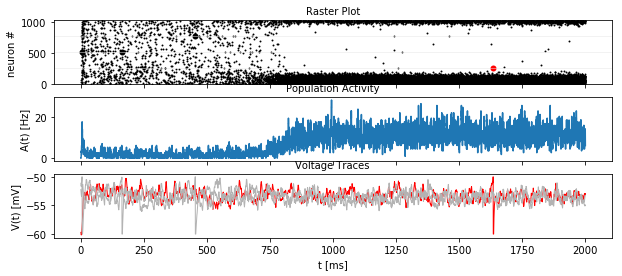

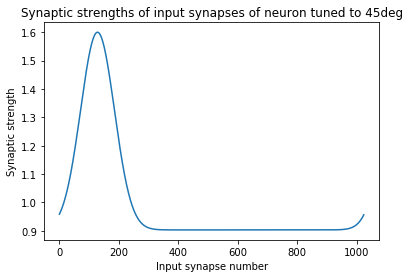

In [6]:
sim_time_duration    = 2000. * ms
poisson_firing_rate  = 2.3 * Hz
sigma_weight_profile = 20.
Jpos_excit2excit     = 1.6
t_stimulus_start=0*ms
t_stimulus_duration=0*ms

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, weight_profile_45 = wm_model.simulate_wm(sim_time=sim_time_duration, poisson_firing_rate=poisson_firing_rate, sigma_weight_profile=sigma_weight_profile, Jpos_excit2excit=Jpos_excit2excit, t_stimulus_start=t_stimulus_start, t_stimulus_duration=t_stimulus_duration)
plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * ms)

plt.figure()
plt.plot(weight_profile_45)
plt.title('Synaptic strengths of input synapses of neuron tuned to 45deg')
plt.xlabel('Input synapse number')
plt.ylabel('Synaptic strength')

**Figure caption:**

Synaptic profile of one postsynaptic neuron tuned to preferred direction 45deg. Vertical axis (ordinate) is the synaptic strength of each presynaptic neuron connecting to this postsynaptic neuron. Horizontal axis (abscissa) is the presynaptic neuron ID. 

**12.1.3. Question: Weight profile: What is the effect of Jpos\_excit2excit and sigma\_weight\_profile?** 

Changing Jpos\_excit2excit determines the amplitude (max value) of the synaptic strength distribution. With higher value of Jpos\_excit2excit a spontaneous activity 'bump' is more likely to be formed and earlier. 

Changing sigma\_weight\_profile affects the Standard Deviation (with) of the gaussian excitatory synaptic strength distribution. The higher the value of sigma\_weight\_profile the wider the synaptic strength distribution width and the wider the activity 'bump'. With higher value of sigma\_weight\_profile a spontaneous activity 'bump' is more likely to be formed and earlier.

Response to Structured Input Stimulus
---------------------------------------------

We now apply stimulation to a subset of the excitatory population of neurons.

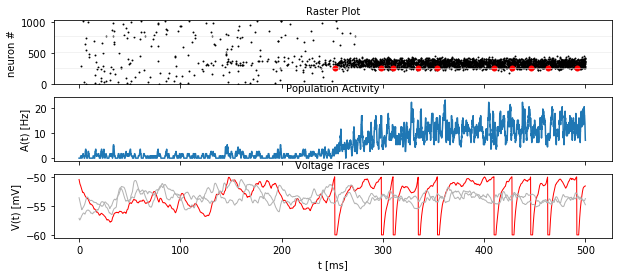

In [7]:
stimulus_center_deg=120
stimulus_width_deg=30
stimulus_strength=.06 * namp
t_stimulus_start=100. * ms
t_stimulus_duration=200. * ms
sim_time_duration=500. * ms

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(stimulus_center_deg=stimulus_center_deg, stimulus_width_deg=stimulus_width_deg, stimulus_strength=stimulus_strength, t_stimulus_start=t_stimulus_start, t_stimulus_duration=t_stimulus_duration, sim_time=sim_time_duration)
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * ms)
plt.show()

**12.2.1. Question: Integration of input:**

**At which time can you identify a change in the population activity?** 
You can see a change in the spiking activity of the stimulated subset of the neurons shortly after the current injection is applied (t=100ms) but the activity 'bump' is only getting strong and sustained at t=200ms that is 100ms after the commencment of the current injection. 

**Increase the stimulus strength to 0.5namp. What happens when the stimulus stops?** 
Now the activity 'bump' starts almost as soon as the current injection starts at t=100ms. With that level of stimulus there is a drop is the population average activity when the stimulus stops. 

**Increase the stimulus width to 60deg (stimulus_strength=0.1 * b2.namp, stimulus center = 120deg). How does the bump shape change?**
The activity 'bump' however is wider during the stimulation and then returns to normal activity 'bump' width.

**12.2.2. Question: Role of the inhibitory population:** 

**Remove the inhibitory population by setting its size to the minimal size N_inhibitory = 1. Describe your observations.**
Without the inhibitory population all excitatory neurons fire and there is a periodic oscilation of activity. 

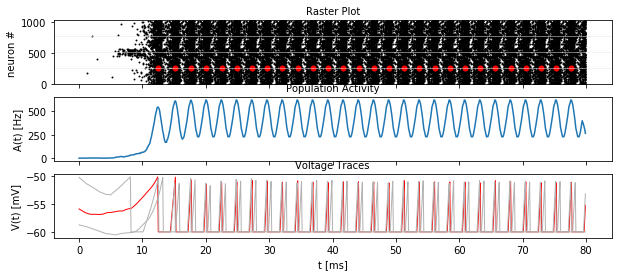

In [8]:
N_inhibitory = 1
stimulus_strength=0.65 * namp
t_stimulus_start=5 * ms
t_stimulus_duration=25 * ms
sim_time_duration=80. * ms

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(N_inhibitory = N_inhibitory, stimulus_strength=stimulus_strength, t_stimulus_start=t_stimulus_start, t_stimulus_duration=t_stimulus_duration, sim_time=sim_time_duration)
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * ms)
plt.show()

**12.2.2. Question: Role of the inhibitory population:** 
**Plot the raster plot of population activity and voltage traces for the inhibitory population.**

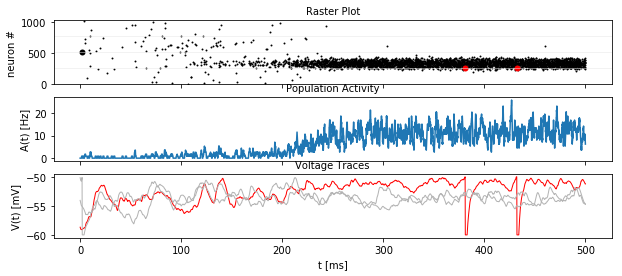

Text(0,0.5,u'Inhibitory Neuron ID')

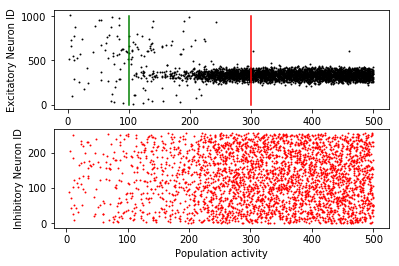

In [9]:
stimulus_center_deg=120
stimulus_width_deg=30
stimulus_strength=.06 * namp
t_stimulus_start=100 * ms
t_stimulus_duration=200 * ms
sim_time_duration=500. * ms

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(stimulus_center_deg=stimulus_center_deg, stimulus_width_deg=stimulus_width_deg, stimulus_strength=stimulus_strength, t_stimulus_start=t_stimulus_start, t_stimulus_duration=t_stimulus_duration, sim_time=sim_time_duration)
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * ms)
plt.show()


plt.figure()
ax1 = plt.subplot('211')
ax2 = plt.subplot('212')
ax1.scatter(spike_monitor_excit.t/ms, spike_monitor_excit.i,
                              marker=".", c="k", s=15, lw=0)
ax2.scatter(spike_monitor_inhib.t/ms, spike_monitor_inhib.i,
                              marker=".", c="r", s=15, lw=0)
ax1.plot([100,100], [0,1000], 'g')
ax1.plot([300,300], [0,1000], 'r')
plt.xlabel('Population activity')
ax1.set_ylabel('Excitatory Neuron ID')
ax2.set_ylabel('Inhibitory Neuron ID')

**Figure caption:**

Top: The raster plot of the excitatory neuronal population with greed and red verticla lines indicating the commencement and end of the stimulus.

Bottom: The raster plot of the inhibitory neuronal population activity.

12.3. Exercise: Decoding the population activity into a population vector
------------------------------------------------------------------------------------



In [2]:
def get_orientation(idx_list, N):
    """
        idx_list : list indeces of neurons
        N        : Number of neurons
        returns  : list of theta angle preferences of neurons in the list of indeces
        
        The circle 360 is broken into N intervals and the angle corresponding in 
        the middle of the interval is calculated. 
    """
    interval = 360. / N 
    interval_middle  = 360. / N / 2

    return  (interval_middle + interval * np.array(idx_list)).tolist()


In [3]:
def get_spike_count(spike_monitor, spike_index_list, t_min, t_max):
    """
        Returns : A list of spike counts
    """
    nr_neurons = len(spike_index_list)
    spike_count_list = np.zeros(nr_neurons)
    if isinstance(spike_monitor, SpikeMonitor):
        spike_trains = spike_monitor.spike_trains()
    elif isinstance(spike_monitor, dict): # If it is a dict() assume it is the result of spike_trains()
        spike_trains = spike_monitor
    
    spike_count_list = []
    
    for idx in spike_index_list:
        num_of_spikes = np.sum(np.logical_and(spike_trains[idx] >= t_min, spike_trains[idx] < t_max))
        spike_count_list.append(num_of_spikes)
    
    return spike_count_list

In [4]:
#t = 400*ms
#t_delta = 10*ms
#tmin = t - t_delta
#tmax = t + t_delta
#get_spike_count(spike_monitor_excit, np.arange(0,1024).tolist(), tmin, tmax)

In [5]:
t = 400*ms  # time point of interest
t_window = 300*ms # width of the window over which the average is taken

t_min = t-t_window/2
t_max = t+t_window/2
spike_counts = get_spike_count(spike_monitor_excit, idx_monitored_neurons_excit, t_min, t_max)
spike_rates = spike_counts/(t_max-t_min)/second
plt.plot(spike_rates, ".b")
plt.title("Bump profile in the time interval[{},{}]".format(t_min, t_max))
plt.xlabel("Neuron index")
plt.ylabel("Spike rate [Hz]")

NameError: name 'spike_monitor_excit' is not defined

In [6]:
def add_vectors(vectors_list, polar_or_cartesian='polar', angles_in='rads'):
    """
        Adds a list of vectors and returns the total vector. Receives a list of 
        vector tupples or lists in polar or cartesian coordinates and returns 
        the vector addition of all of them. 
        
        vectors_list : a list of vector tupples or lists in polar or cartesian coordinates.
        polar_or_cartesian : 'polar' or 'cartesian' specifies the coordinate system used.
        angles_in          : 'rads' or 'degrees' specifies how the angular values should be interpreted.
        Returns : A tupple (x_total, y_total, r_total, theta_total)
    """
    cartesian_vector_list = []
    if polar_or_cartesian=='polar':
        for v in vectors_list:
            r, th = v
            if angles_in == 'degrees':
                th = np.radians(th)
            if th > (2*np.pi):
                th = th % (2*np.pi)
            x = r * np.cos(th)
            y = r * np.sin(th)
            cartesian_vector_list.append([x, y])
        
    if polar_or_cartesian=='cartesian':
        cartesian_vector_list = vectors_list
    
    # Calculate total of vector addition
    x_total = 0.
    y_total = 0.
    for v in cartesian_vector_list:
        x, y = v
        x_total += x
        y_total += y

    # Convert to polar coordinates
    r_total     = np.sqrt(x_total**2 + y_total**2)
    #theta_total = np.arctan(y_total / x_total)
    theta_total = np.arctan2(y_total, x_total)
    
    # arctan2 returns a mapping of 0 to 180 to the range 0 to 180 and 181 to 360 to the range -179 to -1
    if theta_total < 0.:
        theta_total = (2*np.pi) + theta_total
    
    if theta_total > (2*np.pi):
        theta_total = theta_total % (2*np.pi)

    if angles_in == 'degrees':
        theta_total = np.degrees(theta_total)
    
    return (x_total, y_total, r_total, theta_total)


In [7]:
def get_theta_time_series_vec_add(spike_monitor, idx_monitored_neurons, total_num_of_neurons, t_snapshots, t_window_width):
    """ 
        This implementation is more accurate. It uses the add_vectors() function to 
        add the constituent vectors in order to derive the population coded vector. 
    """
    theta_angles = get_orientation(idx_monitored_neurons, total_num_of_neurons)
    theta_angles = np.array(theta_angles)
    theta_time_series = []
    for t_snap in t_snapshots:
        t_min = t_snap - t_window_width/2
        t_max = t_snap + t_window_width/2
        spike_counts = get_spike_count(spike_monitor, idx_monitored_neurons, t_min, t_max)
        spike_counts_ndarray = np.array(spike_counts)
        
        polar_vectors_list = list(zip(spike_counts_ndarray, theta_angles))
        x_total, y_total, r_total, theta_total = add_vectors(polar_vectors_list, 
                                                             polar_or_cartesian='polar', 
                                                             angles_in='degrees')
        
        theta_time_series.append(theta_total)

    return theta_time_series

In [8]:
def get_theta_time_series(spike_monitor, idx_monitored_neurons, total_num_of_neurons, t_snapshots, t_window_width):
    """
        This implementation is the typical population activity weighted vector. It is 
        inaccurate near 0deg as well as when there is noise in the population activity. 
    """
    theta_angles = get_orientation(idx_monitored_neurons, total_num_of_neurons)
    theta_angles = np.array(theta_angles)
    theta_time_series = []
    for t_snap in t_snapshots:
        t_min = t_snap - t_window_width/2
        t_max = t_snap + t_window_width/2
        spike_counts = get_spike_count(spike_monitor, idx_monitored_neurons, t_min, t_max)
        spike_counts_ndarray = np.array(spike_counts)
        
        theta_time_series.append(np.sum(spike_counts_ndarray * theta_angles) / np.sum(spike_counts_ndarray))

    return theta_time_series

In [49]:
def add_gaussian_white_noise_by_variance(data, variance):
    """
        Adds Additive Gaussian White Noise to the given data.
        data : an numpy array with the data to noisify.
        variance : the gaussian noise variance. 
        Since the average power of a random variable $X$ is $E[X^2] = \mu^2 + \sigma^2$ 
        and we set $\mu = 0$, it follows that $E[X^2] = \sigma^2$ thus the power of the 
        variable is determined by its variance. 
        Returns : the data with added noise.
    """
    sigma_sd = np.sqrt(variance)
    noise = np.random.normal(loc=0., scale=sigma_sd, size=data.shape)
    noisy_data = data + noise
    return noisy_data

def add_gaussian_white_noise_by_magnitude(data, noise_magnitude):
    """
        Adds Additive Gaussian White Noise to the given data.
        data : an numpy array with the data to noisify.
        noise_magnitude : the amount of noise to add. Let that be a portion of noise in (0,1)
        Returns : the data with added noise.
    """
    signal_amplitude = np.max(np.max(data)) # - np.min(np.min(data))
    signal_power = signal_amplitude ** 2
    signal_power_dB = 10. * np.log10(signal_power)
    
    signal_av_power = np.mean(signal_power)
    signal_av_power_dB = 10. * log10(signal_av_power)
    target_noise_av_power = noise_magnitude * signal_av_power
    target_SNR = signal_av_power / target_noise_av_power
    target_SNR_dB = 10. * log10(target_SNR)
    
    noise_av_dB = signal_av_power_dB - target_SNR_dB
    noise_av_power = 10. ** (noise_av_dB / 10.)
    
    variance = np.sqrt(noise_av_power)
    
    noisy_data = add_gaussian_white_noise_by_variance(data, variance)
    return noisy_data

**12.3.3. Computing the population vector**

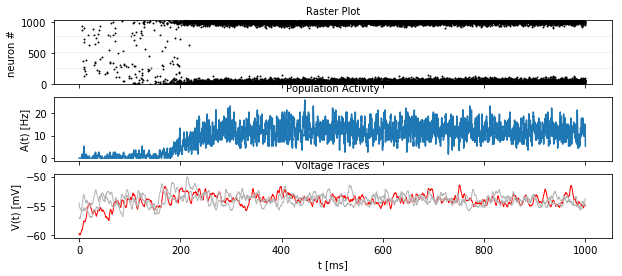

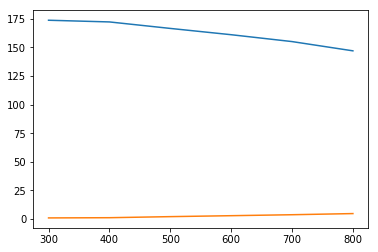

In [17]:
# Example how to create an array of timestamps spaced by snapshot_interval in the interval of interest.
stimulus_center_deg = 360
stimulus_width_deg  = 30
stimulus_strength   = .06 * namp
t_stimulus_start    = 100 * ms
t_stimulus_duration = 200 * ms
sim_time_duration   = 1000. * ms
t_window_width      = 200*ms
snapshot_interval   = 100*ms
N_excitatory = 1024

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(stimulus_center_deg=stimulus_center_deg, stimulus_width_deg=stimulus_width_deg, stimulus_strength=stimulus_strength, t_stimulus_start=t_stimulus_start, t_stimulus_duration=t_stimulus_duration, sim_time=sim_time_duration)
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * ms)
plt.show()

t_snapshots = range(
    int(math.floor((t_stimulus_start+t_stimulus_duration)/ms)),  # lower bound
    int(math.floor((sim_time_duration-t_window_width/2)/ms)),  # Subtract half window. Avoids an out-of-bound error later.
    int(round(snapshot_interval/ms))  # spacing between time stamps
    )*ms

# how your function get_theta_time_series could be called:
theta_ts = get_theta_time_series(spike_monitor_excit, idx_monitored_neurons_excit, N_excitatory, t_snapshots, t_window_width)
theta_ts_v_a = get_theta_time_series_vec_add(spike_monitor_excit, idx_monitored_neurons_excit, N_excitatory, t_snapshots, t_window_width)


# plot theta vs time using pyplot
plt.figure()
plt.plot(t_snapshots/ms, theta_ts)
plt.plot(t_snapshots/ms, theta_ts_v_a)

**12.3.4. Exercise: Visualize the diffusion of the population vector**

Simulate a network of size N_excitatory = 2048. Apply a stimulus from t=100ms to t=300ms. Plot theta(t). Note that when you increase the size of the excitatory population you also have to increase the inhibitory population and the weights (``N_inhibitory'' and ``weight_scaling_factor''). When doubling the number of presynaptic neurons, you have to scale the weights by 0.5 to keep the total synaptic input the same.

Trial:  1
Trial:  2
Trial:  3
Trial:  4
Trial:  5
Trial:  6
Trial:  7
Trial:  8
Trial:  9
Trial:  10
Trial:  11
Trial:  12
Trial:  13
Trial:  14
Trial:  15
Trial:  16
Trial:  17
Trial:  18
Trial:  19
Trial:  20


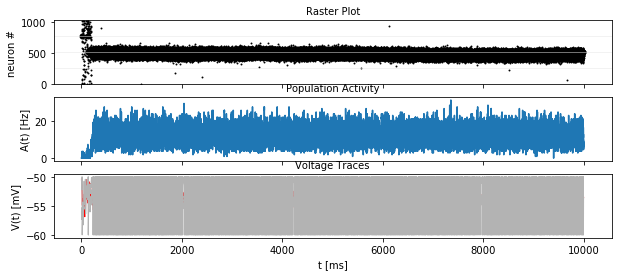

In [35]:
num_of_trials = 20
collected_data_file = 'Data/collected_drift_trials.npy' # The file to store the collected trials data

# Try to load existing data if any otherwise create an empty collection
try:
    collected_trials_data = np.load(collected_data_file, allow_pickle=True, encoding='bytes')
except: 
    collected_trials_data = np.array([]) # Collected trials data records list

stimulus_center_deg   = 180
stimulus_width_deg    = 60
stimulus_strength     = .06 * namp
t_stimulus_start      = 100 * ms
t_stimulus_duration   = 200 * ms
sim_time_duration     = 10000. * ms

N_excitatory          = 1024 # 2048
N_inhibitory          = 256  # 512
weight_scaling_factor = 2.0 # 4.0

for iteration in xrange(num_of_trials):
    print('Trial: ', iteration+1)
    rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(N_excitatory=N_excitatory, N_inhibitory=N_inhibitory, weight_scaling_factor=weight_scaling_factor, stimulus_center_deg=stimulus_center_deg, stimulus_width_deg=stimulus_width_deg, stimulus_strength=stimulus_strength, t_stimulus_start=t_stimulus_start, t_stimulus_duration=t_stimulus_duration, sim_time=sim_time_duration)
    
    # Calculate the population vector angle theta
    theta_ts = get_theta_time_series_vec_add(spike_monitor_excit, idx_monitored_neurons_excit, N_excitatory, t_snapshots, t_window_width)

    # Create a new dictionary with the collected data
    collected_data = dict()
    # Simulation set up info
    collected_data['stimulus_center_deg'] = stimulus_center_deg
    collected_data['stimulus_width_deg'] = stimulus_width_deg
    collected_data['t_stimulus_start'] = t_stimulus_start
    collected_data['t_stimulus_duration'] = t_stimulus_duration
    collected_data['sim_time_duration'] = sim_time_duration
    collected_data['N_excitatory'] = N_excitatory
    collected_data['N_inhibitory'] = N_inhibitory
    collected_data['weight_scaling_factor'] = weight_scaling_factor

    # Data
    #collected_data['rate_monitor_excit'] = rate_monitor_excit
    collected_data['spike_monitor_excit'] = spike_monitor_excit.spike_trains()
    #collected_data['voltage_monitor_excit'] = voltage_monitor_excit
    collected_data['idx_monitored_neurons_excit'] = idx_monitored_neurons_excit
    #collected_data['rate_monitor_inhib'] = rate_monitor_inhib
    collected_data['spike_monitor_inhib'] = spike_monitor_inhib.spike_trains()
    #collected_data['voltage_monitor_inhib'] = voltage_monitor_inhib
    collected_data['idx_monitored_neurons_inhib'] = idx_monitored_neurons_inhib
    collected_data['theta_ts'] = theta_ts
    # Add new data record to the collected trials data
    collected_trials_data = np.append(collected_trials_data, collected_data)

# Save all data in the file
np.save(collected_data_file, collected_trials_data, allow_pickle=True)
#np.savez(collected_data_file, collected_trials_data=collected_trials_data)

    
    
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * ms)
plt.show()


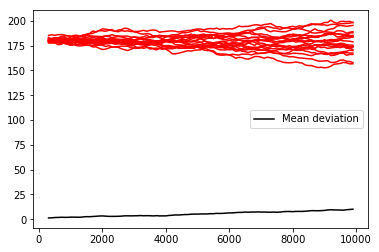

In [48]:
# Example how to create an array of timestamps spaced by snapshot_interval in the interval of interest.
t_window_width      = 100*ms
snapshot_interval   = 100*ms

# Try to load existing data if any otherwise create an empty collection
try:
    collected_trials_data = np.load(collected_data_file, allow_pickle=True, encoding='bytes')
except: 
    collected_trials_data = np.array([]) # Collected trials data records list

theta_ts_abs_diff_list = []

# We use enumerate to add a count to the iterated items of the iterator
for i, item in enumerate(collected_trials_data):
    # Simulation set up info
    stimulus_center_deg              = item['stimulus_center_deg']
    stimulus_width_deg               = item['stimulus_width_deg']
    t_stimulus_start                 = item['t_stimulus_start']
    t_stimulus_duration              = item['t_stimulus_duration']
    sim_time_duration                = item['sim_time_duration']
    N_excitatory                     = item['N_excitatory']
    N_inhibitory                     = item['N_inhibitory']
    weight_scaling_factor            = item['weight_scaling_factor']

    # Data
    spike_monitor_excit_spike_trains = item['spike_monitor_excit']
    idx_monitored_neurons_excit      = item['idx_monitored_neurons_excit']
    spike_monitor_inhib_spike_trains = item['spike_monitor_inhib']
    idx_monitored_neurons_inhib      = item['idx_monitored_neurons_inhib']
    theta_ts                         = item['theta_ts']
    
    t_snapshots = range(
        int(math.floor((t_stimulus_start+t_stimulus_duration)/ms)),  # lower bound
        int(math.floor((sim_time_duration-t_window_width/2)/ms)),  # Subtract half window. Avoids an out-of-bound error later.
        int(round(snapshot_interval/ms))  # spacing between time stamps
        )*ms

    #theta_ts = get_theta_time_series_vec_add(spike_monitor_excit_spike_trains, idx_monitored_neurons_excit, N_excitatory, t_snapshots, t_window_width)
    
    # plot theta vs time using pyplot
    plt.plot(t_snapshots/ms, theta_ts, 'r')
    
    # The absolute value of the differences of the time series samples from the stimulus angle
    abs_diff = np.abs(np.ones(len(theta_ts)) * stimulus_center_deg - theta_ts)
    theta_ts_abs_diff_list.append(abs_diff)

#theta_ts_abs_diff_list = np.array(theta_ts_abs_diff_list)
theta_ts_abs_diff_mean = np.mean(theta_ts_abs_diff_list, axis=0)

plt.plot(t_snapshots/ms, theta_ts_abs_diff_mean, 'k', label='Mean deviation')
plt.legend()

In [34]:
len(theta_ts_abs_diff_list)

20

In [42]:
np.mean(theta_ts_abs_diff_list)

5.418671933691657

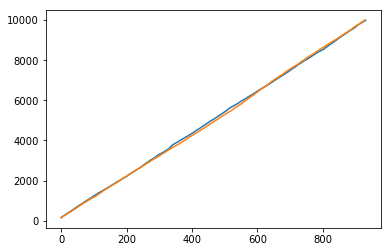

In [56]:
plt.plot(a)
plt.plot(b)